Nama:

In [1]:
print('jasman')

jasman


In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install scipy
!pip install scikit-learn
!pip install xgboost


!pip freeze > requirements.txt

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

df = pd.read_csv("employee.csv")
df.head()

,Unnamed: 0,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,...,1,80,0,8,0,1,6,4,0,5
1,1,2,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,...,4,80,1,10,3,3,10,7,1,7
2,2,3,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,...,2,80,0,7,3,3,0,0,0,0
3,3,4,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,...,3,80,0,8,3,3,8,7,3,0
4,4,5,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,...,4,80,1,6,3,3,2,2,2,2


## Dataset :

The data contains demographic details, work-related metrics and attrition flag.

* **EmployeeNumber** - Employee Identifier
* **Attrition** - Did the employee attrite?
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Data description not available**
* **Department** - Employee Department
* **DistanceFromHome** - Distance from work to home (in km)
* **Education** - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Data description not available**
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly Salary
* **MonthlyRate** - Data description not available**
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Over 18 years of age?
* **OverTime** - Overtime?
* **PercentSalaryHike** - The percentage increase in salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager

# EDA

(1) Drop semua kolom yang tidak diperlukan pada data employee.csv. Lakukan EDA univariat untuk setiap kolom numerik pada employee.csv yang mencakup:<p>
    a. histogram dan boxplot untuk tiap kolom<p>
    b. metrik statistik dasar untuk tiap kolom: mean, std, min, q1, q2, q3, iqr, max<p>
    c. identifikasi nilai upper whisker dan lower whisker dari boxplot tiap kolom<p>
    d. apabila terdapat outlier (<q1-1.5*iqr | >q3+1.5*iqr): hitung count, proportion, dan list dari outlier tiap kolom<p>
        e. identifikasi hal yang menurut anda menarik dari hasil EDA yang Anda dapatkan

In [97]:
df.columns = df.columns.str.strip()
df_1 = df.drop(columns=['Unnamed: 0', 'EmployeeNumber','Over18'], errors='ignore' )
df_1.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,Yes,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,No,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,No,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


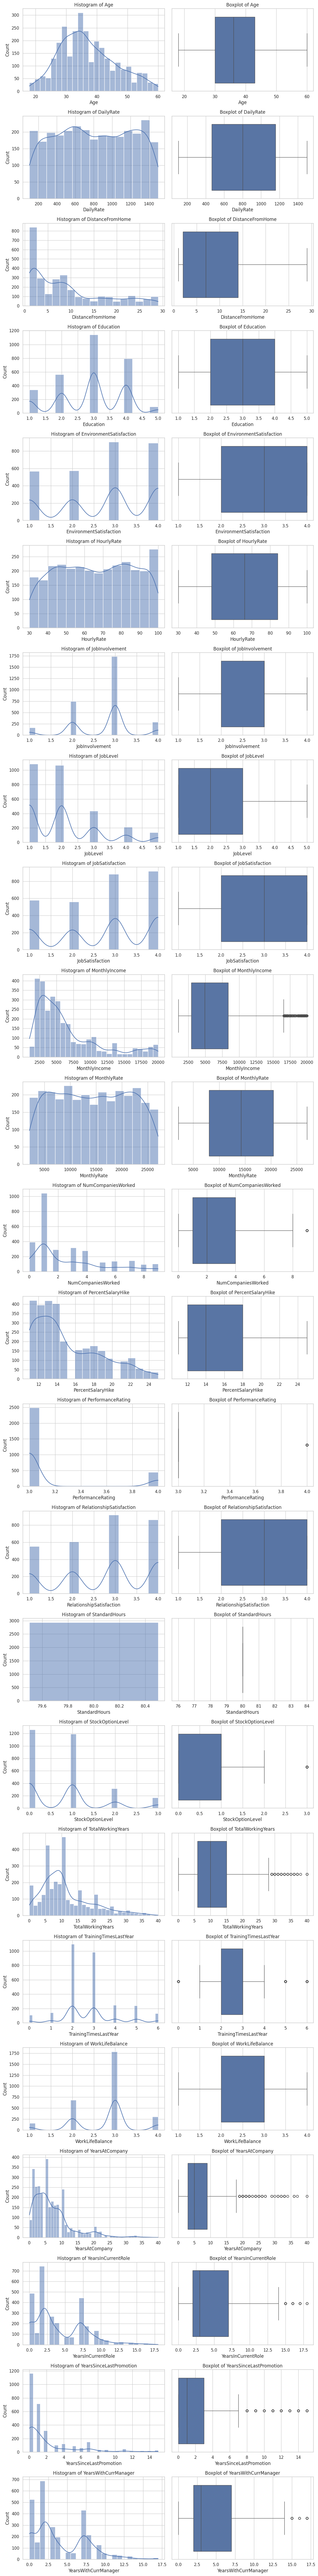

In [98]:
# making histogram and boxplot all columns

numeric_columns = df_1.select_dtypes(include="number").columns
categorical_columns = df_1.select_dtypes(exclude="number").columns.drop("Attrition")
n = len(numeric_columns)


fig, ax = plt.subplots(n, 2, figsize=(12, 4 * n))

for i, col in enumerate(numeric_columns):
    sns.histplot(df_1[col], kde=True, ax=ax[i, 0])
    ax[i, 0].set_title(f"Histogram of {col}")

    sns.boxplot(x=df_1[col], ax=ax[i, 1])
    ax[i, 1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


In [99]:
df[numeric_columns].describe(include="all")

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,1.092896,20.325969,0.711440,1.106752,1.102658,4707.155770,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8380.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [100]:
#Outlier indentification
total_rows = df_1.shape[0]

for col in numeric_columns:
    Q1 = df_1[col].quantile(0.25)
    Q3 = df_1[col].quantile(0.75)
    IQR = Q3 - Q1

    outlier = df_1[
        (df_1[col] < Q1 - 1.5 * IQR) |
        (df_1[col] > Q3 + 1.5 * IQR)
    ]

    outlier_count = outlier[col].count()
    unique_values = outlier[col].unique()
    percentage = (outlier_count / total_rows) * 100

    print(f"\n===== {col} =====")
    print(f"Outlier rows     : {outlier_count}")
    print(f"Unique outliers  : {unique_values}")
    print(f"Percentage       : {percentage:.2f}%")






===== Age =====
Outlier rows     : 0
Unique outliers  : []
Percentage       : 0.00%

===== DailyRate =====
Outlier rows     : 0
Unique outliers  : []
Percentage       : 0.00%

===== DistanceFromHome =====
Outlier rows     : 0
Unique outliers  : []
Percentage       : 0.00%

===== Education =====
Outlier rows     : 0
Unique outliers  : []
Percentage       : 0.00%

===== EnvironmentSatisfaction =====
Outlier rows     : 0
Unique outliers  : []
Percentage       : 0.00%

===== HourlyRate =====
Outlier rows     : 0
Unique outliers  : []
Percentage       : 0.00%

===== JobInvolvement =====
Outlier rows     : 0
Unique outliers  : []
Percentage       : 0.00%

===== JobLevel =====
Outlier rows     : 0
Unique outliers  : []
Percentage       : 0.00%

===== JobSatisfaction =====
Outlier rows     : 0
Unique outliers  : []
Percentage       : 0.00%

===== MonthlyIncome =====
Outlier rows     : 228
Unique outliers  : [19094 18947 19545 18740 18844 18172 17328 16959 19537 17181 19926 19033
 18722 19999 

(2) Lakukan EDA univariat untuk setiap kolom kategorikal pada employee.csv yang mencakup:<p>
    a. countplot untuk tiap kolom<p>
    b. daftar kategori unik dan frekuensinya untuk tiap kolom<p>
        c. identifikasi hal yang menurut anda menarik dari hasil EDA yang Anda dapatkan

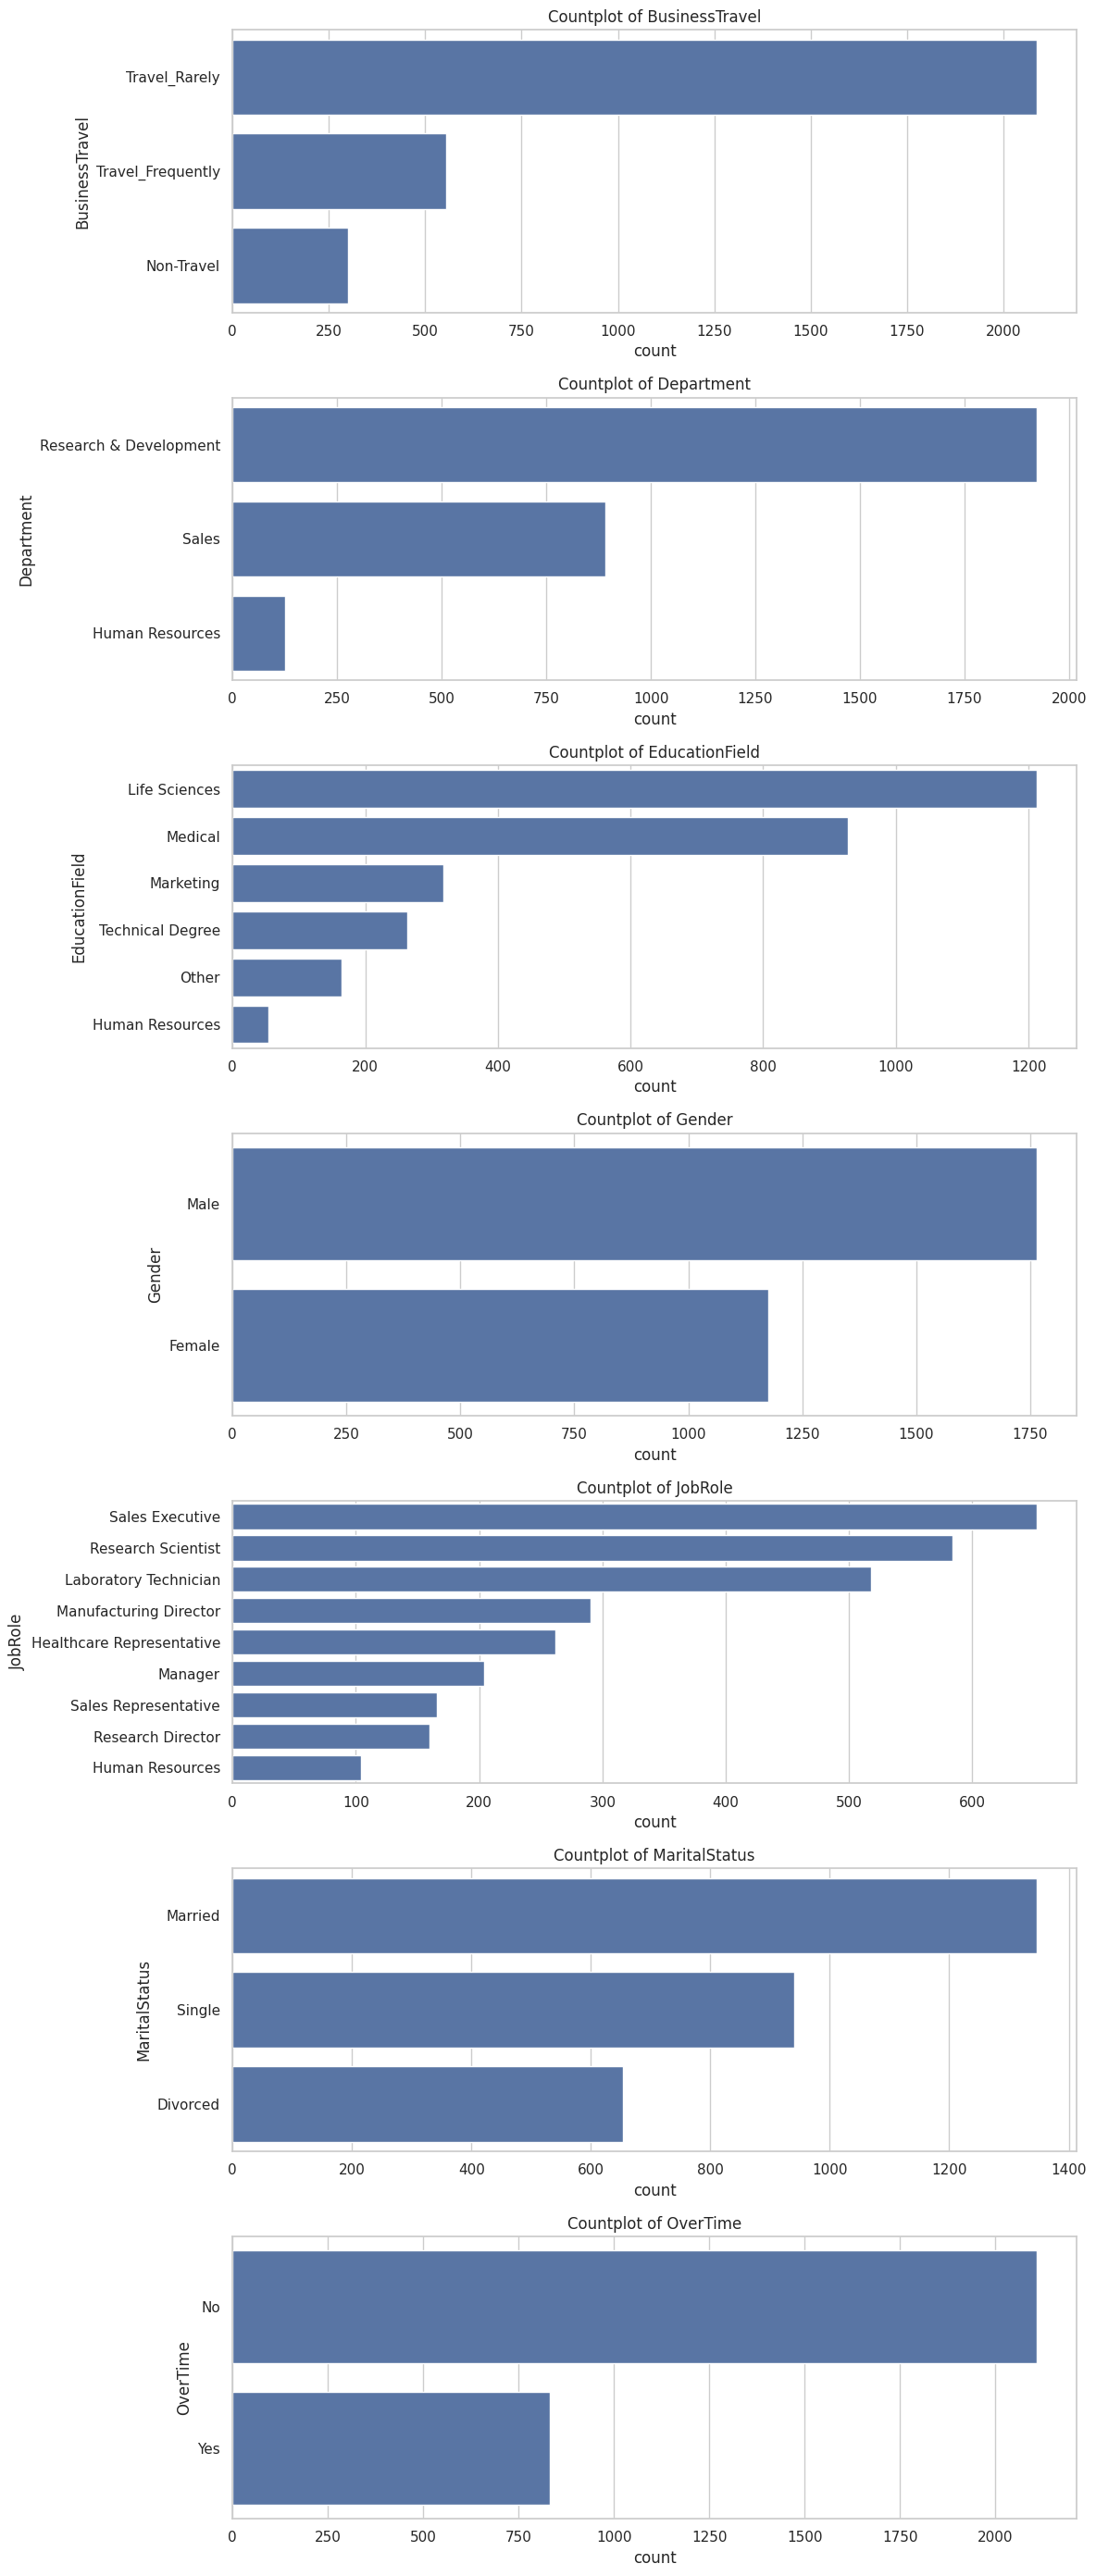

In [101]:
n = len(categorical_columns)

fig, ax = plt.subplots(n, 1, figsize=(12, 4 * n))

for i, col in enumerate(categorical_columns):
    sns.countplot(
        data=df_1,
        y=col,
        order=df_1[col].value_counts().index,
        ax=ax[i]
    )
    ax[i].set_title(f"Countplot of {col}")

plt.tight_layout()
plt.show()


(3) Lakukan EDA multivariat untuk pasangan kolom numerik dan kolom 'Attrition' pada employee.csv yang mencakup:<p>
    a. boxplot (atau variasinya) antara semua kolom numerik (axis y) dan kolom 'attrition' (axis x)<p>
    b. identifikasi hal yang menurut anda menarik dari hasil EDA yang Anda dapatkan

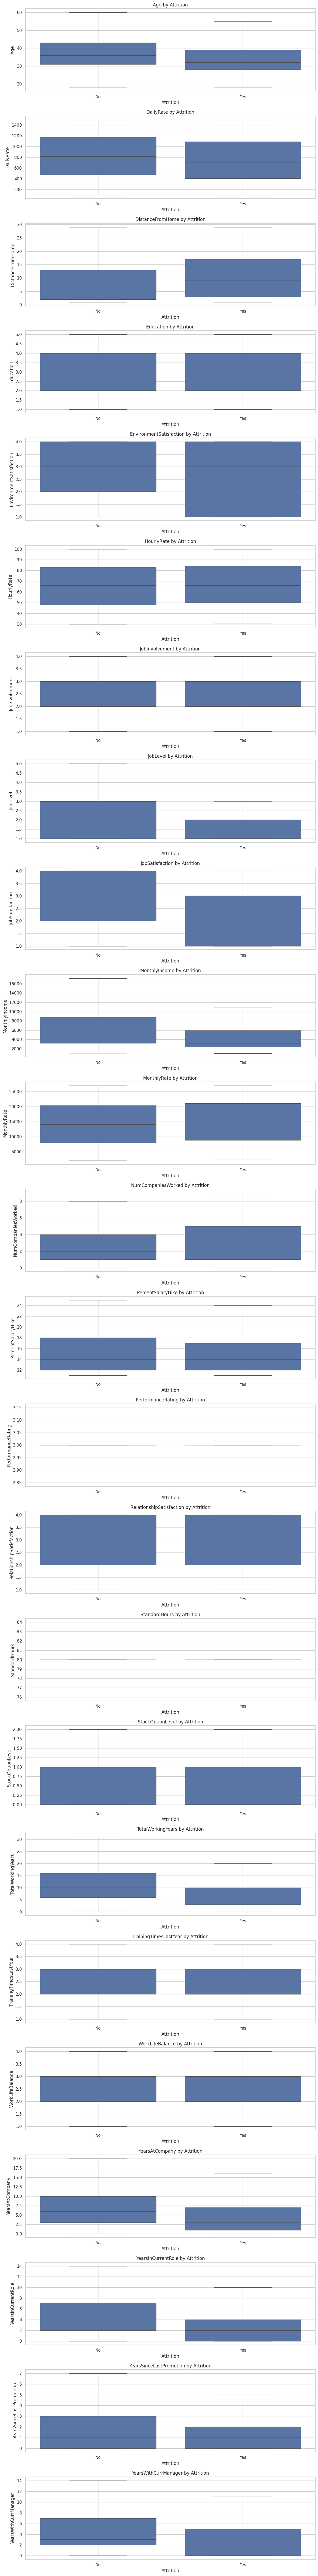

In [102]:
n = len(numeric_columns)

fig, ax = plt.subplots(n, 1, figsize=(12, 4 * n))
df_1["Attrition"] = df_1["Attrition"].astype("category")

for i, col in enumerate(numeric_columns):
    sns.boxplot(
        data=df_1,
        x="Attrition",
        y=col,
        order=df_1["Attrition"].value_counts().index,
        showfliers=False,
        ax=ax[i]
    )
    ax[i].set_title(f"{col} by Attrition")

plt.tight_layout()
plt.show()



(4) Lakukan EDA multivariat untuk pasangan kolom kategorikal dan kolom 'Attrition' pada employee.csv yang mencakup:<p>
    a. countplot untuk tiap kolom kategorikal dengan kolom 'Attrition' sebagai hue <p>
    b. stacked barplot yang menunjukkan proporsi value kolom 'Attrition' untuk masing-masing kategori pada semua kolom kategorikal (1 kolom kategorikal 1 plot, 1 plot berisi stacked bar sejumlah banyaknya kategori unik pada kolom kategori tersebut) <p>
        c. identifikasi hal yang menurut anda menarik dari hasil EDA yang Anda dapatkan

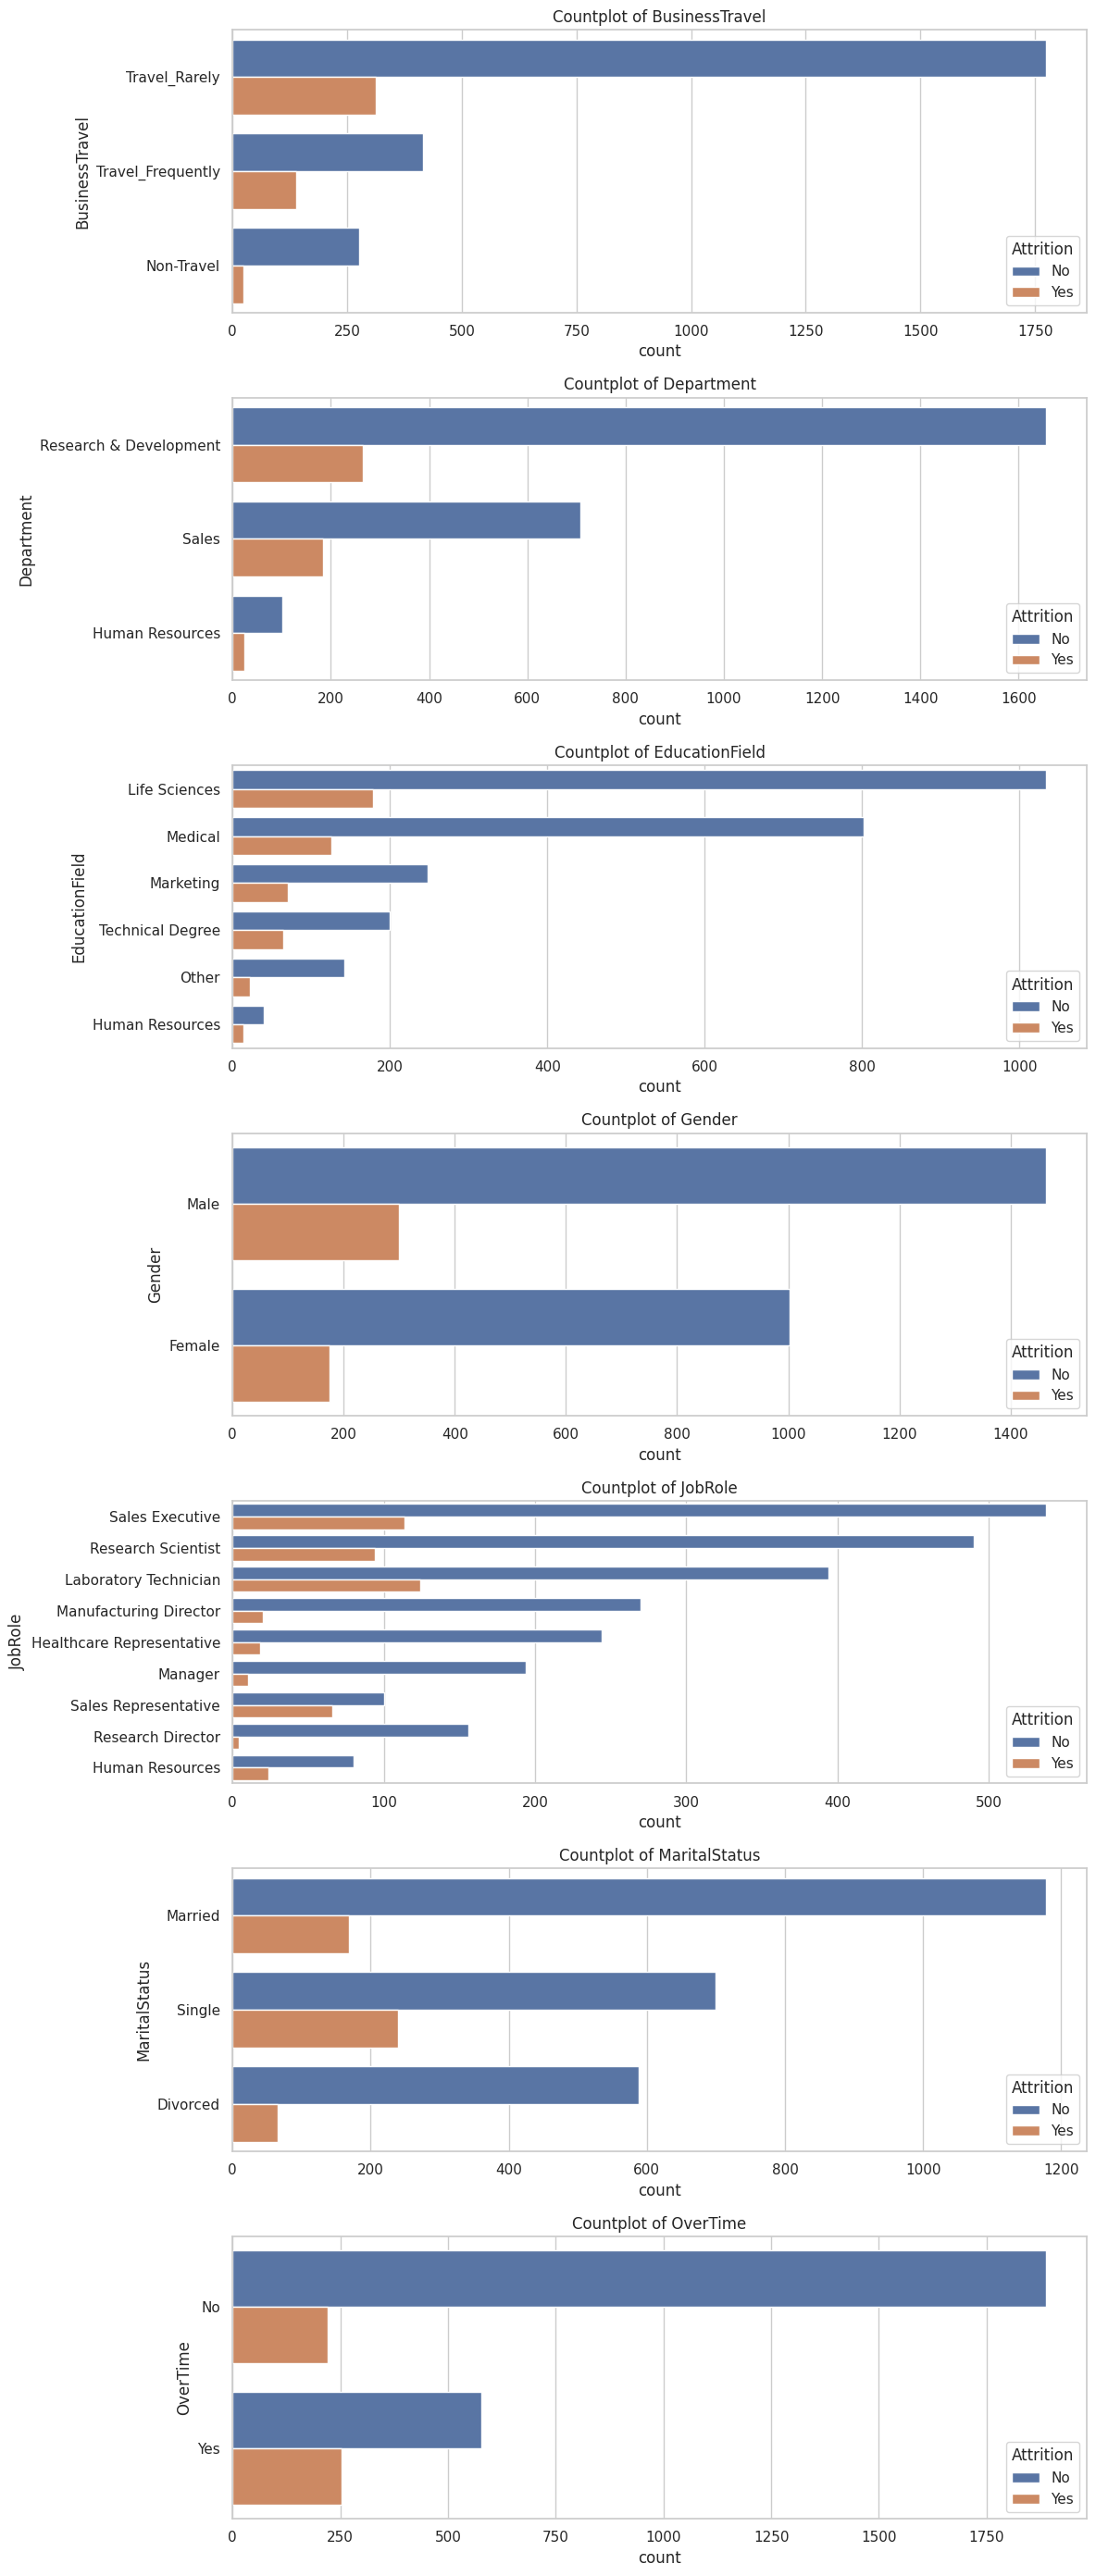

In [103]:
n = len(categorical_columns)

fig, ax = plt.subplots(n, 1, figsize=(12, 4 * n))

for i, col in enumerate(categorical_columns):
    sns.countplot(
        data=df_1,
        y=col,
        order=df_1[col].value_counts().index,
        ax=ax[i],
        hue='Attrition'
    )
    ax[i].set_title(f"Countplot of {col}")

plt.tight_layout()
plt.show()

In [104]:
import plotly.express as px

for col in categorical_columns:
    df_ct = (
        df_1
        .groupby([col, "Attrition"])
        .size()
        .reset_index(name="count")
    )

    fig = px.bar(
        df_ct,
        x=col,
        y="count",
        color="Attrition",
        barmode="stack",
        title=f"Attrition by {col}"
    )

    fig.show()



/tmp/ipython-input-4265967942.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/tmp/ipython-input-4265967942.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/tmp/ipython-input-4265967942.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/tmp/ipython-input-4265967942.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/tmp/ipython-input-4265967942.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/tmp/ipython-input-4265967942.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



/tmp/ipython-input-4265967942.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



(5) Lakukan independen t-test (2-sided) dengan ketentuan: <p>
H0: Tidak ada perbedaan mean 'Total Working Years' antara karyawan yang keluar maupun menetap (gunakan kolom 'Attrition' sebagai acuan)<p>
    H1: Terdapat perbedaan mean 'Total Working Years' antara karyawan yang keluar maupun menetap (gunakan kolom 'Attrition' sebagai acuan)<p>
        alpha = 5%<p>
            Print hasil t-test dan tuliskan kesimpulannya.

In [105]:
from scipy.stats import ttest_ind
'TotalWorkingYears'

group_yes = df_1[df_1["Attrition"] == "Yes"]["TotalWorkingYears"]
group_no  = df_1[df_1["Attrition"] == "No"]["TotalWorkingYears"]

t_stat, p_value = ttest_ind(group_yes, group_no, equal_var=False)  # Welch

alpha = 0.05
if p_value < alpha:
    print("Significant difference (reject H0)")
else:
    print("No significant difference (fail to reject H0)")

Significant difference (reject H0)


(6) Lakukan one-way ANOVA dengan ketentuan: <p>
H0: Tidak ada perbedaan mean 'Age' antara karyawan dari 3 departemen yang ada di dataset<p>
    H1: Setidaknya terdapat 2 departemen yang mean umur karyawannya berbeda<p>
            Print hasil one-way ANOVA dan tuliskan kesimpulannya.

# Classification

(8) Persiapkan dataset untuk klasifikasi. Jadikan kolom 'Attrition' sebagai target (y). Drop semua kolom yang dianggap tidak diperlukan.

In [106]:
df_1.isnull().sum()

,0
Attrition,0
Age,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0
Gender,0


In [107]:
df_1.dtypes

,0
Attrition,category
Age,int64
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EnvironmentSatisfaction,int64
Gender,object


In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
Y = df_1['Attrition']
le = LabelEncoder()
y = le.fit_transform(Y)
X = df_1.drop(columns=['Attrition'], axis=1)



(9) Lakukan train test split, test:test = 4:1, stratify = y.

In [109]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

In [110]:
for col in categorical_columns:
    print(f"Checking number of unique values in column: {col}")
    print(f"Number of unique values: {x_train[col].nunique()}")
    print("-" * 40)

Checking number of unique values in column: BusinessTravel
Number of unique values: 3
----------------------------------------
Checking number of unique values in column: Department
Number of unique values: 3
----------------------------------------
Checking number of unique values in column: EducationField
Number of unique values: 6
----------------------------------------
Checking number of unique values in column: Gender
Number of unique values: 2
----------------------------------------
Checking number of unique values in column: JobRole
Number of unique values: 9
----------------------------------------
Checking number of unique values in column: MaritalStatus
Number of unique values: 3
----------------------------------------
Checking number of unique values in column: OverTime
Number of unique values: 2
----------------------------------------


(10) Lakukan feature engineering yang dianggap diperlukan pada trainset: imputation, encoding, scaling, selection, dll. Lakukan transformasi serupa pada testset tanpa melakukan fitting kembali.

In [118]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)

numeric_columns = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = x_train.select_dtypes(include=['object', 'category']).columns


numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

(11) Siapkan 3 estimator: lakukan cross-validation dengan estimator Logistic Regression, Decision Tree Classifier, dan XGBoost Classifier (apabila tidak bisa install xgboost silahkan pilih classifier lain untuk menggantikan) untuk menentukan nilai optimal untuk berbagai hyperparameter masing-masing estimator.

In [119]:
models = {
    "Logistic Regression": Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(
            random_state=42,
            max_iter=1000
        ))
    ]),
    "Decision Tree": Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", DecisionTreeClassifier(
            random_state=42
        ))
    ]),
    "XGBoost": Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", XGBClassifier(
            random_state=42,
            n_jobs=-1
        ))
    ])
}

In [120]:
lr_parameters = {
    "classifier__C": [0.01, 0.1, 1, 10]
}

dt_parameters= {
    "classifier__max_depth": [None, 10, 20],
    "classifier__min_samples_split": [2, 5],
    "classifier__min_samples_leaf": [1, 2],
    "classifier__max_features": ["sqrt", "log2"]
}

xgb_parameters = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [3, 5],
    "classifier__learning_rate": [0.05, 0.1],
}



In [121]:
model_dict = {
    "Logistic Regression": (models["Logistic Regression"], lr_parameters),
    "Decision Tree": (models["Decision Tree"], dt_parameters),
    "XGBoost": (models["XGBoost"], xgb_parameters)
}

In [122]:
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

In [123]:
results ={}

for model_name, (model, params) in model_dict.items():
    print(f"\n🔍 Training {model_name}")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=cv,
        scoring="accuracy",
        n_jobs=-1,
        verbose=2,
        refit=True
    )
    grid_search.fit(x_train, y_train)
    best_accuracy = grid_search.best_score_

    results[model_name] = {
        "best_params": grid_search.best_params_,
        "cv_accuracy": best_accuracy,
        "best_model": grid_search.best_estimator_
    }
    print(f"✅ Best Params: {grid_search.best_params_}")
    print(f"📈 CV Accuracy: {best_accuracy:.4f}")




🔍 Training Logistic Regression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
✅ Best Params: {'classifier__C': 0.1}
📈 CV Accuracy: 0.8848

🔍 Training Decision Tree
Fitting 5 folds for each of 24 candidates, totalling 120 fits
✅ Best Params: {'classifier__max_depth': 20, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
📈 CV Accuracy: 0.9188

🔍 Training XGBoost
Fitting 5 folds for each of 8 candidates, totalling 40 fits
✅ Best Params: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
📈 CV Accuracy: 0.9481


(12) Fit ketiga estimator dengan trainset. Print classification report untuk trainset dan testset untuk ketiga estimator.

In [126]:
from sklearn.metrics import classification_report

def evaluate_model(model, x_train, y_train, x_test, y_test):
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    train_report = classification_report(y_train, y_train_pred)
    test_report = classification_report(y_test, y_test_pred)

    return train_accuracy, test_accuracy, train_report, test_report



In [128]:
for model_name, result in results.items():
    best_model = result["best_model"]
    train_accuracy, test_accuracy, train_report, test_report = evaluate_model(
        best_model, x_train, y_train, x_test, y_test
    )

    print(f"\n📌 {model_name}")
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy :", test_accuracy)
    print("Train Report:")
    print(train_report)
    print("Test Report:")
    print(test_report)


📌 Logistic Regression
Train Accuracy: 0.8928571428571429
Test Accuracy : 0.8945578231292517
Train Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1973
           1       0.84      0.42      0.56       379

    accuracy                           0.89      2352
   macro avg       0.87      0.70      0.75      2352
weighted avg       0.89      0.89      0.88      2352

Test Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       493
           1       0.82      0.44      0.58        95

    accuracy                           0.89       588
   macro avg       0.86      0.71      0.76       588
weighted avg       0.89      0.89      0.88       588


📌 Decision Tree
Train Accuracy: 1.0
Test Accuracy : 0.9591836734693877
Train Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1973
           1       1.00      1.

(13) Dari hasil performansi yang Anda dapatkan manakah estimator yang paling baik?

# Regression

(14) Persiapkan dataset untuk regresi. Jadikan kolom 'MonthlyIncome' sebagai target.

In [84]:
y = df_1['MonthlyIncome']
X = df_1.drop(columns=['MonthlyIncome'])

(15) Split trainset dan testset. test size = 0.2.

In [85]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [75]:
numeric_columns = x_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = x_train.select_dtypes(include=['object', 'category']).columns


(16) Lakukan transformasi yang diperlukan pada trainset. Lakukan juga pada testset tanpa fitting ulang.

In [77]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

(17) Siapkan 2 regressor learning alg.: (1) linear/polynomial dan (2) decision tree/random forest/xgboost regressor. Dengan menggunakan cross validation tentukan hyperparamer optimal untuk kedua regressor.

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
import numpy as np


models = {

    "Polynomial Regression": Pipeline([
        ("preprocessor", preprocessor), # Add the preprocessor here
        ("poly", PolynomialFeatures(include_bias=False)),
        ("lr", LinearRegression())
    ]),

    "Random Forest Regressor": Pipeline([
        ("preprocessor", preprocessor), # Add the preprocessor here
        ("rf", RandomForestRegressor(
            random_state=42,
            n_jobs=-1
        ))
    ]),

    "XGBoost Regressor": Pipeline([
        ("preprocessor", preprocessor), # Add the preprocessor here
        ("xgb", XGBRegressor(
            objective="reg:squarederror",
            random_state=42,
            n_jobs=-1
        ))
    ])
}


In [87]:
poly_parameters = {
    "poly__degree": [1, 2, 3],
    "lr__fit_intercept": [True]
}

rf_parameters = {
    "rf__n_estimators": [100, 200],
    "rf__max_depth": [None, 10, 20],
    "rf__min_samples_split": [2, 5],
    "rf__min_samples_leaf": [1, 2],
    "rf__max_features": ["sqrt", "log2"]
}

xgb_parameters = {
    "xgb__n_estimators": [100, 200],
    "xgb__max_depth": [3, 5],
    "xgb__learning_rate": [0.05, 0.1],
    "xgb__subsample": [0.8, 1.0],
    "xgb__colsample_bytree": [0.8, 1.0]
}

In [88]:
model_dict = {
    "Polynomial Regression": (models["Polynomial Regression"], poly_parameters),
    "Random Forest": (models["Random Forest Regressor"], rf_parameters),
    "XGBoost": (models["XGBoost Regressor"], xgb_parameters)
}

In [89]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [90]:
results = {}

for model_name, (model, params) in model_dict.items():

    print(f"\n🔍 Training {model_name}")

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=cv,
        scoring="neg_root_mean_squared_error",
        n_jobs=-1,
        verbose=2,
        refit=True
    )

    grid_search.fit(x_train, y_train)

    best_rmse = -grid_search.best_score_

    results[model_name] = {
        "best_params": grid_search.best_params_,
        "cv_rmse": best_rmse,
        "best_model": grid_search.best_estimator_
    }

    print(f"✅ Best Params: {grid_search.best_params_}")
    print(f"📉 CV RMSE: {best_rmse:.4f}")


🔍 Training Polynomial Regression
Fitting 5 folds for each of 3 candidates, totalling 15 fits
✅ Best Params: {'lr__fit_intercept': True, 'poly__degree': 3}
📉 CV RMSE: 1056.3818

🔍 Training Random Forest
Fitting 5 folds for each of 48 candidates, totalling 240 fits
✅ Best Params: {'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
📉 CV RMSE: 785.9164

🔍 Training XGBoost
Fitting 5 folds for each of 32 candidates, totalling 160 fits
✅ Best Params: {'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 200, 'xgb__subsample': 0.8}
📉 CV RMSE: 675.2242


(18) Print metrics r2, mse, rmse, mae, dan mape (dalam bentuk dataframe) trainset vs testset untuk kedua regressor. Manakah model yang lebih baik performance-nya?

In [91]:
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error
)

def evaluate_model(model, x_train, y_train, x_test, y_test):
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_metrics = {
        "R2": r2_score(y_train, y_train_pred),
        "MSE": train_mse,
        "RMSE": np.sqrt(train_mse),
        "MAE": mean_absolute_error(y_train, y_train_pred),
        "MAPE": mean_absolute_percentage_error(y_train, y_train_pred)
    }

    test_metrics = {
        "R2": r2_score(y_test, y_test_pred),
        "MSE": test_mse,
        "RMSE": np.sqrt(test_mse),
        "MAE": mean_absolute_error(y_test, y_test_pred),
        "MAPE": mean_absolute_percentage_error(y_test, y_test_pred)
    }

    return train_metrics, test_metrics




In [92]:
for model_name, result in results.items():
    best_model = result["best_model"]

    train_metrics, test_metrics = evaluate_model(
        best_model, x_train, y_train, x_test, y_test
    )

    print(f"\n📌 {model_name}")
    print("Train:", train_metrics)
    print("Test :", test_metrics)



📌 Polynomial Regression
Train: {'R2': 1.0, 'MSE': 2.672008790164132e-22, 'RMSE': np.float64(1.634628028073706e-11), 'MAE': 1.2096240864587523e-11, 'MAPE': 2.619432317998132e-15}
Test : {'R2': 0.9825771897764611, 'MSE': 357591.5073351548, 'RMSE': np.float64(597.9895545368287), 'MAE': 198.6308197724001, 'MAPE': 0.04416834206100674}

📌 Random Forest
Train: {'R2': 0.9973163341794358, 'MSE': 60447.554518516146, 'RMSE': np.float64(245.86084380908673), 'MAE': 167.9743494897959, 'MAPE': 0.03606391886053206}
Test : {'R2': 0.9834460936902827, 'MSE': 339757.8366306973, 'RMSE': np.float64(582.8874991202824), 'MAE': 413.88273809523815, 'MAPE': 0.09681014177892922}

📌 XGBoost
Train: {'R2': 0.9964889883995056, 'MSE': 79083.046875, 'RMSE': np.float64(281.2170814068733), 'MAE': 201.22341918945312, 'MAPE': 0.04710971564054489}
Test : {'R2': 0.9855178594589233, 'MSE': 297235.90625, 'RMSE': np.float64(545.1934576368282), 'MAE': 377.2825927734375, 'MAPE': 0.09376208484172821}


# Clustering

(19) Lakukan transformasi yang diperlukan pada dataset employee

(21) Dengan menggunakan elbow method dan sillhouette score tentukan nilai k optimal untuk pembuatan model kmeans/kmedoids clustering

(22) Tambahkan 1 kolom 'label' pada dataset yang berisi nomor cluster untuk tiap row, berdasarkan model kmeans clustering yang telah dibuat.